In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [3]:
bank=pd.read_csv('/Users/souravghoshhansda/Library/CloudStorage/OneDrive-Personal/data exploration/Bank_Data.csv')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# age: age of a person
# job: type of job
# marital: marital status
# education
# default: has credit in default? ('no','yes','unknown')
# balance: average yearly balance
# housing: has housing loan? ('no','yes','unknown')
# loan: has personal loanduration ? ('no','yes','unknown')
# contact: contact communication type ('cellular','telephone')
# day: The day of the month when the contact was last made.
# month: The month of the year when the last contact was made.
# duration: The duration of the last contact in seconds.
# campaign: The number of contacts performed during the campaign for the individual.
# pdays: The number of days that passed after the last contact from a previous campaign. A value of -1 indicates that the
# individual was not previously contacted.
# previous: The number of contacts performed before this campaign for the individual.
# poutcome: The outcome of the previous marketting campaign (e.g. success, failure, others)
# The aim of the project is to predict if the client will subscribe(yes/no) to a term deposit. This is a classification
# model, because the target variable is categorical. We can apply Logistic, Decision Tree, Random Forest etc for this data set.

In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
bank.loan.value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

In [10]:
bank.housing.value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

In [11]:
bank.deposit.value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [12]:
categorical_columns = list(bank.select_dtypes(include=['object']).dtypes.index)
print(categorical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [13]:
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in bank.columns: #Iterates through each column in the DataFrame.
    if len(bank[column].unique()) <= 30:#Checks if the column's data type is 'object' (typically indicating a categorical variable) and if the number of unique values in that column is 30 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_col list.
        print(f"{column} : {bank[column].unique()}") #Prints the name of the column and its unique values.
        print(f"{column} : {bank[column].value_counts()}")
        print("====================================") # Prints a separator line for clarity.
        
#The purpose of this code is to help you identify and inspect categorical columns in your DataFrame, particularly those with a manageable number of unique categories. This information is useful for data exploration and analysis, especially when you need to decide how to handle categorical variables in machine learning or data analysis tasks.

job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
job : job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital : ['married' 'single' 'divorced']
marital : marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
education : ['secondary' 'tertiary' 'primary' 'unknown']
education : education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
default : ['no' 'yes']
default : default
no     10994
yes      168
Name: count, dtype: int64
housing : ['yes' 'no']
housing : housing
no     5881
yes    5281
Name: count, dtype: int64
loan : ['no' 'yes']
loan : loan
no     9702
ye

In [14]:
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='deposit', ylabel='count'>

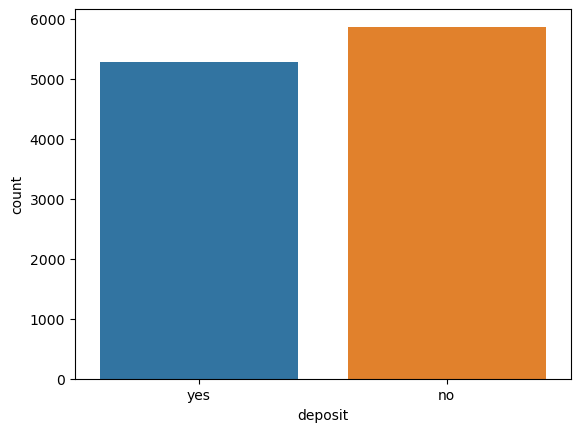

In [15]:
sns.countplot(x='deposit',data=bank)

In [16]:
deposit_yes=len(bank[bank.deposit=='yes'])
deposit_yes

5289

In [17]:
deposit_no=len(bank[bank.deposit=='no'])
deposit_no

5873

In [18]:
print("Having Bank Deposit %: {:.2f}%".format((deposit_yes / (len(bank.deposit))*100)))

Having Bank Deposit %: 47.38%


In [19]:
print("Having no Bank Deposit %: {:.2f}%".format((deposit_no / (len(bank.deposit))*100)))

Having no Bank Deposit %: 52.62%


In [20]:
loan_yes=len(bank[bank.loan=='yes'])
loan_yes

1460

In [21]:
loan_no=len(bank[bank.loan=='no'])
loan_no

9702

In [22]:
deposit_yes_loan=len(bank[(bank['loan'] =='yes') & (bank['deposit'] == 'yes')])
deposit_yes_loan

484

In [23]:
print("Having Bank Deposit and loan %: {:.2f}%".format((deposit_yes_loan / loan_yes*100)))

Having Bank Deposit and loan %: 33.15%


In [24]:
deposit_no_loan=len(bank[(bank['loan'] =='no') & (bank['deposit'] == 'yes')])
deposit_no_loan

4805

In [25]:
print("Having Bank Deposit and no loan %: {:.2f}%".format((deposit_yes / loan_no*100)))

Having Bank Deposit and no loan %: 54.51%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

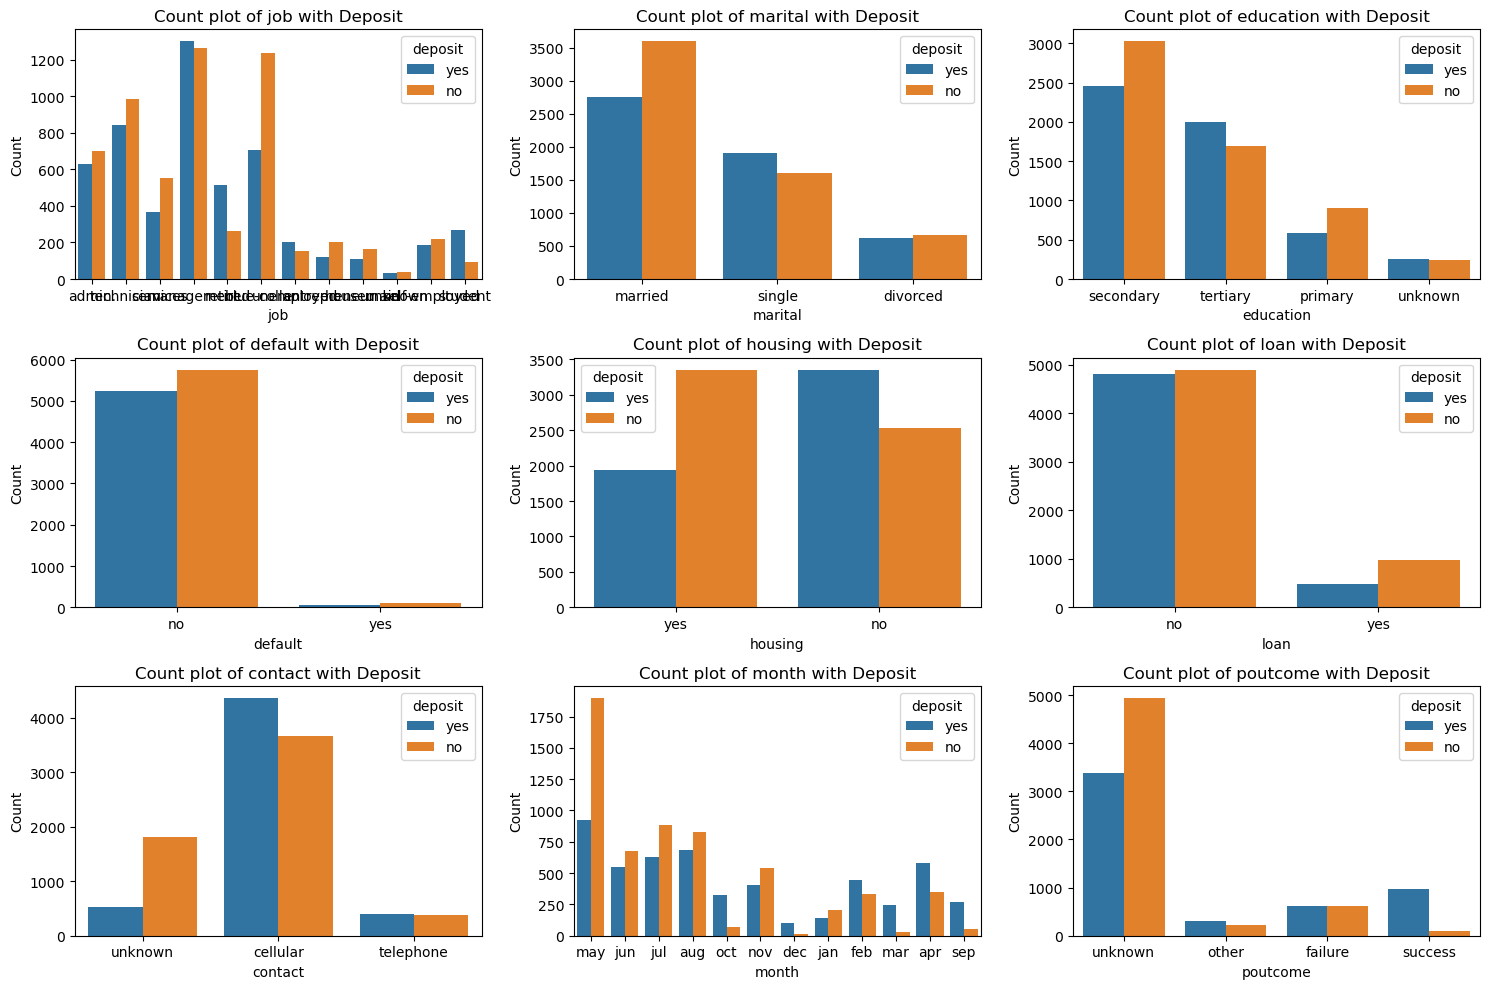

In [26]:
#checking the inter relationship of all the features with the target variable to understand the importance of the feature columns
features = ['job','marital','education','default','housing', 'loan', 'contact', 'month', 'poutcome']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)#3 rows, 3 columns
    sns.countplot(x=feature, hue='deposit', data=bank)
    plt.title(f'Count plot of {feature} with Deposit')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()
#hw:write the insights from this output to explain which of the 8 features are impacted by target and which are not

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

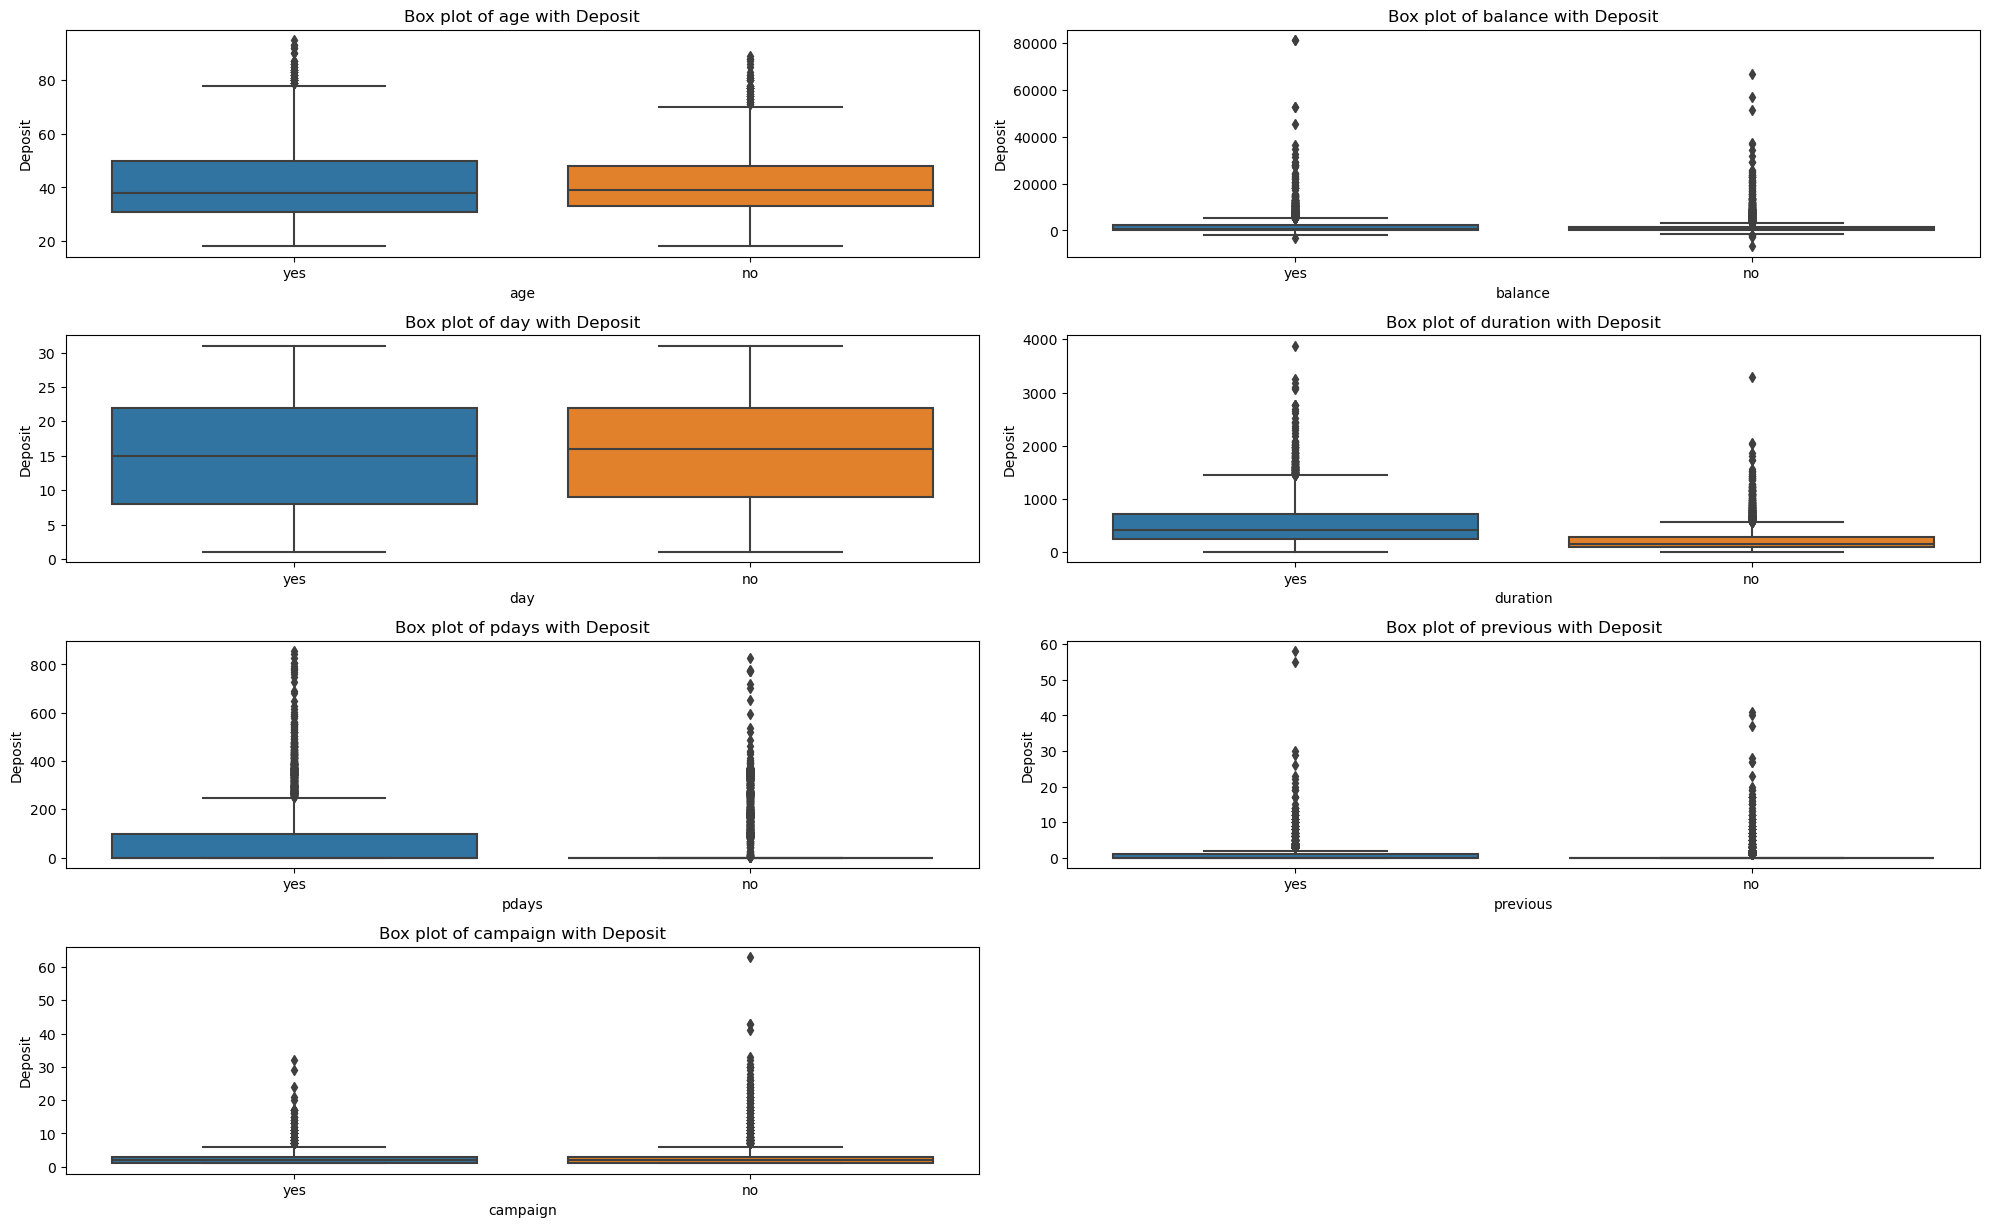

In [27]:
features = ['age', 'balance', 'day', 'duration','pdays','previous','campaign']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)#5rows, 2 columns
    sns.boxplot(y=feature, x='deposit', data=bank)
    plt.title(f'Box plot of {feature} with Deposit')
    plt.xlabel(feature)
    plt.ylabel('Deposit')

plt.tight_layout()
plt.show()
#hw:write the insights from this output to explain which of the 5 features are impacted by target and which are not

In [28]:
numerical_df=list(bank.select_dtypes(exclude=['object']).dtypes.index)
numerical_df

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [29]:
numerical_columns= ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numerical_df = bank[numerical_columns + ['deposit']]
numerical_df

,age,balance,day,duration,campaign,pdays,previous,deposit
0,59,2343,5,1042,1,-1,0,yes
1,56,45,5,1467,1,-1,0,yes
2,41,1270,5,1389,1,-1,0,yes
3,55,2476,5,579,1,-1,0,yes
4,54,184,5,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,no
11158,39,733,16,83,4,-1,0,no
11159,32,29,19,156,2,-1,0,no
11160,43,0,8,9,2,172,5,no


In [30]:
numerical_df.groupby('deposit').median()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,39.0,414.0,16.0,163.0,2.0,-1.0,0.0
yes,38.0,733.0,15.0,426.0,2.0,-1.0,0.0


In [31]:
#check the percentage of deposit=yes category within each of the job caegories passed within the different categories in column job
#which job categories which look similar for which can be combined

In [32]:
# Creating a list 'jobs' with different categories

jobs=['management','blue-collar','technician','admin.','services','retired','self-employed','student','unemployed','entrepreneur','housemaid','unknown']
for j in jobs:
    print("{:20} : {:10}". format(j, len(bank[(bank.deposit == "yes") 
                                               & (bank.job ==j)])))

management           :       1301
blue-collar          :        708
technician           :        840
admin.               :        631
services             :        369
retired              :        516
self-employed        :        187
student              :        269
unemployed           :        202
entrepreneur         :        123
housemaid            :        109
unknown              :         34


step1:We are initiating a loop where j iterates over a list of job categories presented by the variable 'jobs'

step2:We are printing the job category 'j' and the count of yes values in the deposit column for that job category

step3:print("{:20} : {:10}". format(j, len(bank[(bank.deposit == "yes") & (bank.job ==j)]))) this is a string formatting statement that prints the category j in a field of width 20 characters and the count of yes values for that job category in a field of width 10 characters.We are calculating count of rows where both deposit column is yes and the job category matches the current job category.

In summary the output here provides a summary of how many people with each job category have made deposit yes in that data-set


In [33]:
# Creating a list 'jobs' with different categories

jobs=['management','blue-collar','technician','admin.','services','retired','self-employed','student','unemployed','entrepreneur','housemaid','unknown']
for j in jobs:
    print("{:20} : {:10}". format(j, len(bank[(bank.deposit == "no") 
                                               & (bank.job ==j)])))

management           :       1265
blue-collar          :       1236
technician           :        983
admin.               :        703
services             :        554
retired              :        262
self-employed        :        218
student              :         91
unemployed           :        155
entrepreneur         :        205
housemaid            :        165
unknown              :         36


In [34]:
total_entries=len(bank)
total_entries

11162

In [35]:
#calculate the percentage of deposit=yes count for each of the job categories
jobs=['management','blue-collar','technician','admin.','services','retired','self-employed','student','unemployed','entrepreneur','housemaid','unknown']
for j in jobs:
    # Count the number of 'deposit=yes' for the current job category
    deposit_yes_count = len(bank[(bank.deposit == "yes") & (bank.job == j)])
    
    # Calculate the percentage
    percentage = (deposit_yes_count / total_entries) * 100
    
    # Print the result
    print("{:20} : {:10} : {:5.2f}%".format(j, deposit_yes_count, percentage))

management           :       1301 : 11.66%
blue-collar          :        708 :  6.34%
technician           :        840 :  7.53%
admin.               :        631 :  5.65%
services             :        369 :  3.31%
retired              :        516 :  4.62%
self-employed        :        187 :  1.68%
student              :        269 :  2.41%
unemployed           :        202 :  1.81%
entrepreneur         :        123 :  1.10%
housemaid            :        109 :  0.98%
unknown              :         34 :  0.30%


In [36]:
bank['job'] = bank['job'].replace(['management', 'admin.'], 'white-collar')

In [37]:
bank.job.value_counts()

job
white-collar     3900
blue-collar      1944
technician       1823
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [38]:
# housemaid is a type of service provider, so we can combine services and housemaid
# 'retired', 'student', 'unemployed', 'unknown' all of them come under unemployed only, so we can combine them.
bank['job']=bank['job'].replace(['services', 'housemaid.'], 'pink-collar')
bank['job']=bank['job'].replace(['retired','unemployed','unknown','student'], 'others')


In [39]:
bank.poutcome.value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [40]:
#combine unknown into other in poutcome
bank['poutcome']=bank['poutcome'].replace(['unknown'], 'other')


In [41]:
bank.poutcome.value_counts()

poutcome
other      8863
failure    1228
success    1071
Name: count, dtype: int64

In [42]:
#drop day,month & contact as day and month signify respectively the last contact day of the month and the last contact month of the year, which is not important for the bank to understand if the customer will do a deposit or not.And we are dropping contact column as every participent has been contacted either via cellular or unknown or telephone.
bank.drop(['month','contact','day'],axis=1,inplace=True)

In [43]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'deposit'],
      dtype='object')

In [44]:
bank

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,1042,1,-1,0,other,yes
1,56,white-collar,married,secondary,no,45,no,no,1467,1,-1,0,other,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,-1,0,other,yes
3,55,pink-collar,married,secondary,no,2476,yes,no,579,1,-1,0,other,yes
4,54,white-collar,married,tertiary,no,184,no,no,673,2,-1,0,other,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,-1,0,other,no
11158,39,pink-collar,married,secondary,no,733,no,no,83,4,-1,0,other,no
11159,32,technician,single,secondary,no,29,no,no,156,2,-1,0,other,no
11160,43,technician,married,secondary,no,0,no,yes,9,2,172,5,failure,no


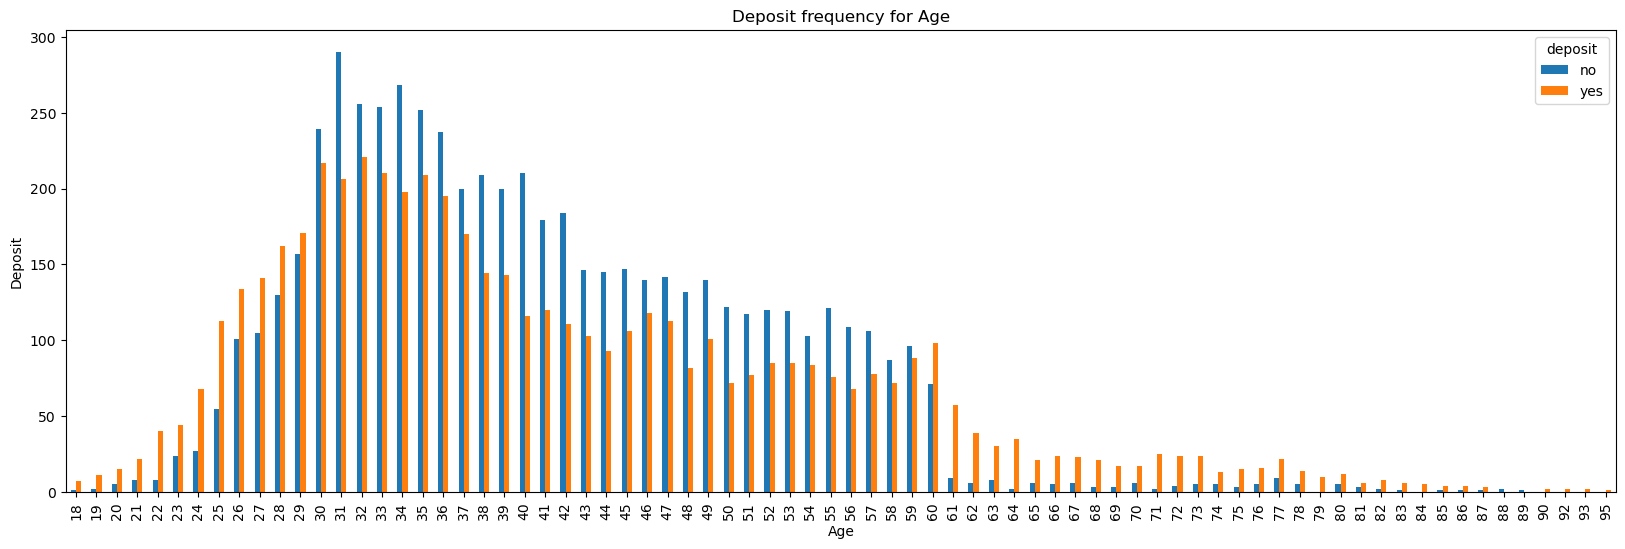

In [45]:
#check the overall distribution of age vs deposit using crosstab
pd.crosstab(bank.age,bank.deposit).plot(kind="bar",figsize=(20,6))
plt.title('Deposit frequency for Age')
plt.xlabel('Age')
plt.ylabel('Deposit')
plt.savefig('Deposit according to Age.png')#how to save an image in python


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Axes: xlabel='age', ylabel='balance'>

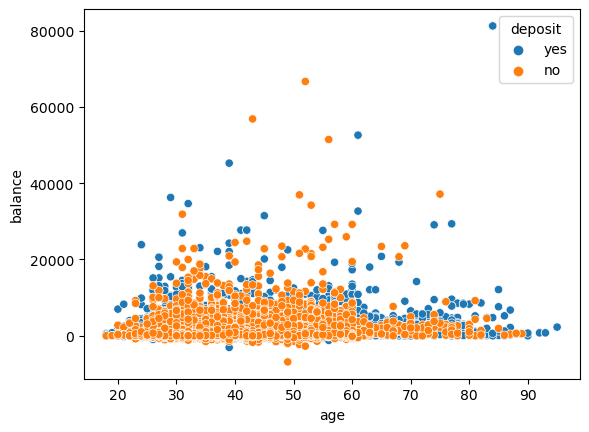

In [46]:
#find the inter-relationship age vs deposit with respect to balance
sns.scatterplot(x='age',y='balance',data=bank,hue='deposit')

for balance less than 30,000 all ages can be our target customers for deposit as the target variable & have positive correlation 

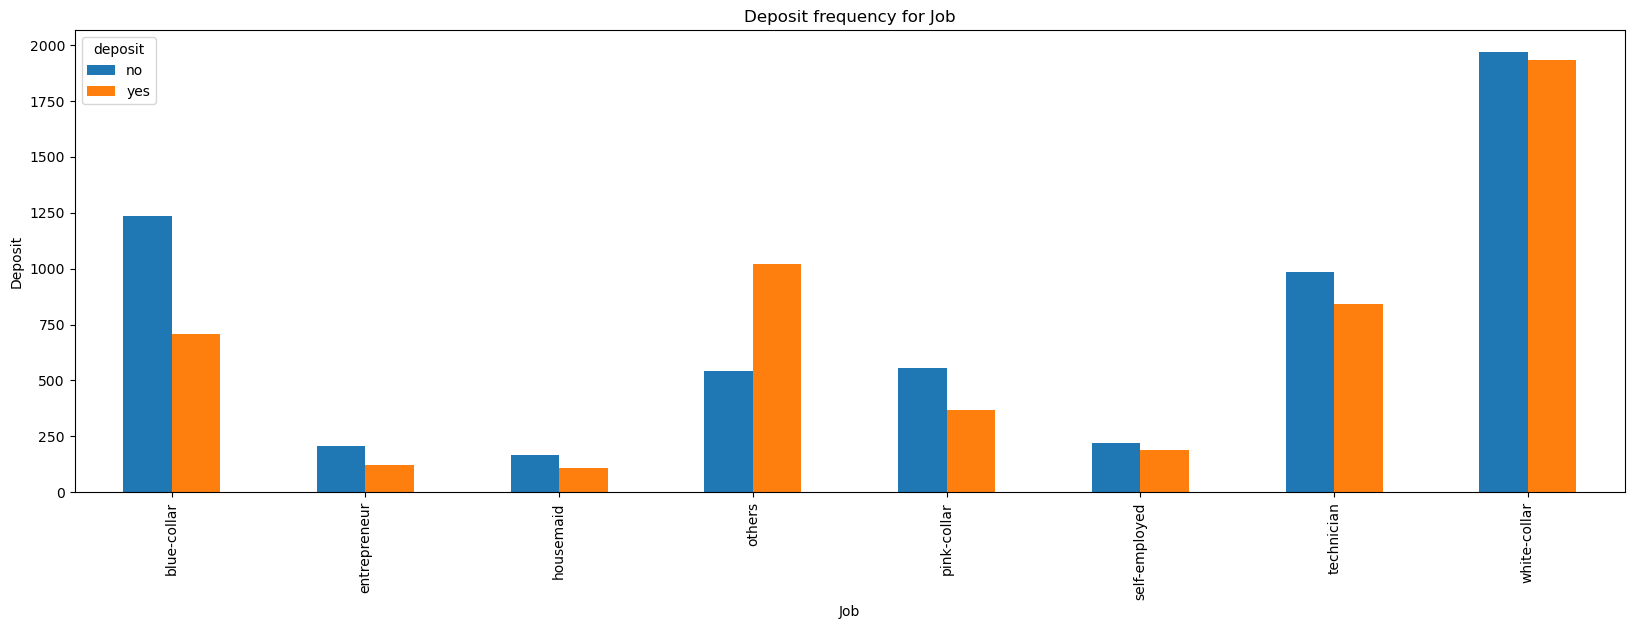

In [47]:
#find the inter-relationship job vs deposit 
pd.crosstab(bank.job,bank.deposit).plot(kind="bar",figsize=(20,6))
plt.title('Deposit frequency for Job')
plt.xlabel('Job')
plt.ylabel('Deposit')
plt.savefig('Deposit according to Job.png')#how to save an image in python


due to percentage we can concur that management jobs are more than the white-collar jobs therefore the above crosstab is not valid.Thus we need to target the people having mangement jobs

In [48]:
bank.job.value_counts()

job
white-collar     3900
blue-collar      1944
technician       1823
others           1565
pink-collar       923
self-employed     405
entrepreneur      328
housemaid         274
Name: count, dtype: int64

In [49]:
#calculate the percentage of deposit=yes count for each of the job categories
jobs=['white-collar','blue-collar','technician','pink-collar','others','self-employed','entrepreneur','housemaid']
for j in jobs:
    # Count the number of 'deposit=yes' for the current job category
    deposit_yes_count = len(bank[(bank.deposit == "yes") & (bank.job == j)])
    
    # Calculate the percentage
    percentage = (deposit_yes_count / total_entries) * 100
    
    # Print the result
    print("{:20} : {:10} : {:5.2f}%".format(j, deposit_yes_count, percentage))

white-collar         :       1932 : 17.31%
blue-collar          :        708 :  6.34%
technician           :        840 :  7.53%
pink-collar          :        369 :  3.31%
others               :       1021 :  9.15%
self-employed        :        187 :  1.68%
entrepreneur         :        123 :  1.10%
housemaid            :        109 :  0.98%


white-collar consists of 'management' & 'admin' which is again the most high percentage of deposit when compared to other categories.So we would be targetting more of white-collar category for target=deposit

In [50]:
bank.pdays.value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

In [51]:
bank.shape

(11162, 14)

In [52]:
# Find maximum number in 'pdays' column
bank['pdays'].max()

854

In [53]:
# Find the number of people having 'pdays=-1'
len(bank[bank.pdays == -1])

8324

number of days that passed by after the client was last contacted from a previous campaign=pdays.

-1 means client was not previously contacted

number of customers that have not been contacted before=8324

maximum value of pdays=854

we will map pdays=-1 into a large value compared to 854 to indicate that it is so far in the past that it has no effect(10,000 can be used)

we can change pdays=-1 to 10,000  by using the loc function such that we can select specific rows and columns in the data frame as per the condition bank.pdays == -1 is true

In [54]:
bank.loc[bank['pdays'] == -1, 'pdays'] = 10000

In [55]:
bank.pdays.value_counts()

pdays
10000    8324
92        106
182        89
91         84
181        81
         ... 
437         1
728         1
518         1
828         1
118         1
Name: count, Length: 472, dtype: int64

we are creating a new column recent_pdays with the  reciprocal of pdays because we want to decrease the weightage in the pdays column for the clients who have never been contacted significantly

In [56]:
# The condition bank['pdays'] checks if the pdays column has non zero values. In python, non zero values are considered True
# and zero values are considered as False. Therefore this condition will be true when pdays is non zero and False, when pdays 
# is zero.
# 1/bank.pdays (1st one) is the value to assign where the condition is True. It calculates reciprocal of the pdays column for
# rows where pdays is non zero.
# 1/bank.pdays (2nd one) is also the value to assign where the condition is False (else condition). It may seem redundant
# as it assigns the same value as for 'True', effectively applying the reciprocal operation to all rows, including
# those where pdays is zero. This may be unintensional and could be simplified to any other desired value.
bank['recent_pdays']= np.where(bank['pdays'], 1/bank.pdays, 1/bank.pdays)

In [57]:
bank

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit,recent_pdays
0,59,white-collar,married,secondary,no,2343,yes,no,1042,1,10000,0,other,yes,0.000100
1,56,white-collar,married,secondary,no,45,no,no,1467,1,10000,0,other,yes,0.000100
2,41,technician,married,secondary,no,1270,yes,no,1389,1,10000,0,other,yes,0.000100
3,55,pink-collar,married,secondary,no,2476,yes,no,579,1,10000,0,other,yes,0.000100
4,54,white-collar,married,tertiary,no,184,no,no,673,2,10000,0,other,yes,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,10000,0,other,no,0.000100
11158,39,pink-collar,married,secondary,no,733,no,no,83,4,10000,0,other,no,0.000100
11159,32,technician,single,secondary,no,29,no,no,156,2,10000,0,other,no,0.000100
11160,43,technician,married,secondary,no,0,no,yes,9,2,172,5,failure,no,0.005814


In [58]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit,recent_pdays
0,59,white-collar,married,secondary,no,2343,yes,no,1042,1,10000,0,other,yes,0.0001
1,56,white-collar,married,secondary,no,45,no,no,1467,1,10000,0,other,yes,0.0001
2,41,technician,married,secondary,no,1270,yes,no,1389,1,10000,0,other,yes,0.0001
3,55,pink-collar,married,secondary,no,2476,yes,no,579,1,10000,0,other,yes,0.0001
4,54,white-collar,married,tertiary,no,184,no,no,673,2,10000,0,other,yes,0.0001


In [59]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit,recent_pdays
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,10000,0,other,no,0.000100
11158,39,pink-collar,married,secondary,no,733,no,no,83,4,10000,0,other,no,0.000100
11159,32,technician,single,secondary,no,29,no,no,156,2,10000,0,other,no,0.000100
11160,43,technician,married,secondary,no,0,no,yes,9,2,172,5,failure,no,0.005814
11161,34,technician,married,secondary,no,0,no,no,628,1,10000,0,other,no,0.000100


In [60]:
bank.drop(['pdays'],axis=1,inplace=True)

In [61]:
bank

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,white-collar,married,secondary,no,2343,yes,no,1042,1,0,other,yes,0.000100
1,56,white-collar,married,secondary,no,45,no,no,1467,1,0,other,yes,0.000100
2,41,technician,married,secondary,no,1270,yes,no,1389,1,0,other,yes,0.000100
3,55,pink-collar,married,secondary,no,2476,yes,no,579,1,0,other,yes,0.000100
4,54,white-collar,married,tertiary,no,184,no,no,673,2,0,other,yes,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,0,other,no,0.000100
11158,39,pink-collar,married,secondary,no,733,no,no,83,4,0,other,no,0.000100
11159,32,technician,single,secondary,no,29,no,no,156,2,0,other,no,0.000100
11160,43,technician,married,secondary,no,0,no,yes,9,2,5,failure,no,0.005814


In [62]:
bank.default.value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

In [63]:
bank.marital.value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [64]:
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in bank.columns: #Iterates through each column in the DataFrame.
    if len(bank[column].unique()) <= 30:#Checks if the column's data type is 'object' (typically indicating a categorical variable) and if the number of unique values in that column is 30 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_col list.
        print(f"{column} : {bank[column].unique()}") #Prints the name of the column and its unique values.
        print(f"{column} : {bank[column].value_counts()}")
        print("====================================") # Prints a separator line for clarity.
        
#The purpose of this code is to help you identify and inspect categorical columns in your DataFrame, particularly those with a manageable number of unique categories. This information is useful for data exploration and analysis, especially when you need to decide how to handle categorical variables in machine learning or data analysis tasks.

job : ['white-collar' 'technician' 'pink-collar' 'others' 'blue-collar'
 'entrepreneur' 'housemaid' 'self-employed']
job : job
white-collar     3900
blue-collar      1944
technician       1823
others           1565
pink-collar       923
self-employed     405
entrepreneur      328
housemaid         274
Name: count, dtype: int64
marital : ['married' 'single' 'divorced']
marital : marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
education : ['secondary' 'tertiary' 'primary' 'unknown']
education : education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
default : ['no' 'yes']
default : default
no     10994
yes      168
Name: count, dtype: int64
housing : ['yes' 'no']
housing : housing
no     5881
yes    5281
Name: count, dtype: int64
loan : ['no' 'yes']
loan : loan
no     9702
yes    1460
Name: count, dtype: int64
poutcome : ['other' 'failure' 'success']
poutcome : poutcome
other      8863
failure    122

job=one-hot

education=one-hot

marital=one-hot

default=label

housing=label

loan=label

poutcome=one-hot

deposit=label

In [65]:
# values for "loan" : yes/no
bank['loan_cat'] = bank['loan'].map({'yes':1, 'no':0})
bank.drop('loan', axis=1,inplace = True)

In [66]:
# values for "default" : yes/no
bank['ldefault_cat'] = bank['default'].map({'yes':1, 'no':0})
bank.drop('default', axis=1,inplace = True)

In [67]:
# values for "housing" : yes/no
bank['housing_cat'] = bank['housing'].map({'yes':1, 'no':0})
bank.drop('housing', axis=1,inplace = True)

In [68]:
# values for "deposit" : yes/no
bank['deposit_cat'] = bank['deposit'].map({'yes':1, 'no':0})
bank.drop('deposit', axis=1,inplace = True)

In [69]:
le = LabelEncoder()
binary=OneHotEncoder(categories='auto')

In [70]:
bank.job.value_counts()

job
white-collar     3900
blue-collar      1944
technician       1823
others           1565
pink-collar       923
self-employed     405
entrepreneur      328
housemaid         274
Name: count, dtype: int64

In [71]:
bank= pd.get_dummies(data=bank, columns=['job','marital','education','poutcome'], prefix=['job','marital','education','poutcome'])

In [72]:
bank

,age,balance,duration,campaign,previous,recent_pdays,loan_cat,ldefault_cat,housing_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
0,59,2343,1042,1,0,0.000100,0,0,1,1,...,False,True,False,False,True,False,False,False,True,False
1,56,45,1467,1,0,0.000100,0,0,0,1,...,False,True,False,False,True,False,False,False,True,False
2,41,1270,1389,1,0,0.000100,0,0,1,1,...,False,True,False,False,True,False,False,False,True,False
3,55,2476,579,1,0,0.000100,0,0,1,1,...,False,True,False,False,True,False,False,False,True,False
4,54,184,673,2,0,0.000100,0,0,0,1,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0.000100,0,0,1,0,...,False,False,True,True,False,False,False,False,True,False
11158,39,733,83,4,0,0.000100,0,0,0,0,...,False,True,False,False,True,False,False,False,True,False
11159,32,29,156,2,0,0.000100,0,0,0,0,...,False,False,True,False,True,False,False,False,True,False
11160,43,0,9,2,5,0.005814,1,0,0,0,...,False,True,False,False,True,False,False,True,False,False


In [73]:
bank.dtypes

age                      int64
balance                  int64
duration                 int64
campaign                 int64
previous                 int64
recent_pdays           float64
loan_cat                 int64
ldefault_cat             int64
housing_cat              int64
deposit_cat              int64
job_blue-collar           bool
job_entrepreneur          bool
job_housemaid             bool
job_others                bool
job_pink-collar           bool
job_self-employed         bool
job_technician            bool
job_white-collar          bool
marital_divorced          bool
marital_married           bool
marital_single            bool
education_primary         bool
education_secondary       bool
education_tertiary        bool
education_unknown         bool
poutcome_failure          bool
poutcome_other            bool
poutcome_success          bool
dtype: object

In [74]:
bank.replace({True:1,False:0},inplace=True)
bank
#if the columns with true or false values have the data type as object then code will be 
#bank.replace({"True":1,"False":0},inplace=True)

,age,balance,duration,campaign,previous,recent_pdays,loan_cat,ldefault_cat,housing_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
0,59,2343,1042,1,0,0.000100,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
1,56,45,1467,1,0,0.000100,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,41,1270,1389,1,0,0.000100,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
3,55,2476,579,1,0,0.000100,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4,54,184,673,2,0,0.000100,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0.000100,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
11158,39,733,83,4,0,0.000100,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
11159,32,29,156,2,0,0.000100,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
11160,43,0,9,2,5,0.005814,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [75]:
#method 2
#bank=bank.astype(int)
bank

,age,balance,duration,campaign,previous,recent_pdays,loan_cat,ldefault_cat,housing_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
0,59,2343,1042,1,0,0.000100,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
1,56,45,1467,1,0,0.000100,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,41,1270,1389,1,0,0.000100,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
3,55,2476,579,1,0,0.000100,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4,54,184,673,2,0,0.000100,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0.000100,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
11158,39,733,83,4,0,0.000100,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
11159,32,29,156,2,0,0.000100,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
11160,43,0,9,2,5,0.005814,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [76]:
bank.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'recent_pdays',
       'loan_cat', 'ldefault_cat', 'housing_cat', 'deposit_cat',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_others',
       'job_pink-collar', 'job_self-employed', 'job_technician',
       'job_white-collar', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [77]:
bank.drop(["job_others","marital_single","poutcome_other","education_unknown"],axis=1,inplace=True)
bank

,age,balance,duration,campaign,previous,recent_pdays,loan_cat,ldefault_cat,housing_cat,deposit_cat,...,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_success
0,59,2343,1042,1,0,0.000100,0,0,1,1,...,0,0,1,0,1,0,1,0,0,0
1,56,45,1467,1,0,0.000100,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
2,41,1270,1389,1,0,0.000100,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0
3,55,2476,579,1,0,0.000100,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
4,54,184,673,2,0,0.000100,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0.000100,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
11158,39,733,83,4,0,0.000100,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
11159,32,29,156,2,0,0.000100,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
11160,43,0,9,2,5,0.005814,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0


job=bank['job']
job1=le.fit_transform(job)
j1=binary.fit_transform(job1.reshape(-1, 1))
j2=j1.toarray()
job_df=pd.DataFrame(j2,columns=['w','b','t','o','p','s','e','h'])
job_df

binary=OneHotEncoder(categories='auto')

In [78]:
bank.education.value_counts()

AttributeError: 'DataFrame' object has no attribute 'education'

education=bank['education']
education1=le.fit_transform(education)
e1=binary.fit_transform(education1.reshape(-1, 1))
e2=e1.toarray()
education_df=pd.DataFrame(e2,columns=['s','t','p','u'])
education_df

binary=OneHotEncoder(categories='auto')

In [79]:
bank.marital.value_counts()

AttributeError: 'DataFrame' object has no attribute 'marital'

marital=bank['marital']
marital1=le.fit_transform(marital)
m1=binary.fit_transform(marital1.reshape(-1, 1))
m2=m1.toarray()
marital_df=pd.DataFrame(m2,columns=['m','s','d'])
marital_df

binary=OneHotEncoder(categories='auto')

In [80]:
bank.poutcome.value_counts()

AttributeError: 'DataFrame' object has no attribute 'poutcome'

poutcome=bank['poutcome']
poutcome1=le.fit_transform(poutcome)
p1=binary.fit_transform(poutcome1.reshape(-1, 1))
p2=p1.toarray()
poutcome_df=pd.DataFrame(p2,columns=['o','s','f'])
poutcome_df

#we need to concatenate education_df,marital_df,poutcome_df,job_df to our original data
data_updated=pd.concat([bank,education_df,marital_df,poutcome_df,job_df],axis=1)
data_updated

#dropping unecessary columns-education,marital,poutcome,job
data_updated.drop(["education","marital","poutcome","job"],axis=1,inplace=True)
data_updated

data_updated.isnull().sum()

data_updated

In [81]:
#dividing the data set into x and y.
x_encoded=bank.drop('deposit_cat',axis=1)
y=bank['deposit_cat']

In [82]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit_cat, Length: 11162, dtype: int64

In [83]:
x_encoded

,age,balance,duration,campaign,previous,recent_pdays,loan_cat,ldefault_cat,housing_cat,job_blue-collar,...,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_success
0,59,2343,1042,1,0,0.000100,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
1,56,45,1467,1,0,0.000100,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,41,1270,1389,1,0,0.000100,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3,55,2476,579,1,0,0.000100,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,54,184,673,2,0,0.000100,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0.000100,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
11158,39,733,83,4,0,0.000100,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
11159,32,29,156,2,0,0.000100,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
11160,43,0,9,2,5,0.005814,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [84]:
scaler=MinMaxScaler()#saving the instance
scaled_data=scaler.fit_transform(x_encoded)
scaled_data=pd.DataFrame(scaled_data,columns=x_encoded.columns)
scaled_data

,age,balance,duration,campaign,previous,recent_pdays,loan_cat,ldefault_cat,housing_cat,job_blue-collar,...,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_success
0,0.532468,0.104371,0.268110,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.493506,0.078273,0.377675,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.298701,0.092185,0.357566,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.480519,0.105882,0.148750,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.467532,0.079851,0.172983,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.077773,0.065739,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11158,0.272727,0.086086,0.020882,0.048387,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
11159,0.181818,0.078091,0.039701,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11160,0.324675,0.077762,0.001805,0.016129,0.086207,0.005715,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [85]:
scaled_data.shape

(11162, 23)

In [86]:
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2,random_state=5)

In [87]:
x_train,x_test,y_train,y_test

(           age   balance  duration  campaign  previous  recent_pdays  \
 944   0.246753  0.139624  0.460686  0.000000  0.000000      0.000000   
 6577  0.350649  0.077762  0.027327  0.064516  0.000000      0.000000   
 9128  0.441558  0.086995  0.028616  0.016129  0.000000      0.000000   
 1616  0.753247  0.097977  0.105955  0.032258  0.000000      0.000000   
 939   0.220779  0.079204  0.041248  0.000000  0.000000      0.000000   
 ...        ...       ...       ...       ...       ...           ...   
 3046  0.090909  0.106734  0.102604  0.032258  0.000000      0.000000   
 9917  0.233766  0.130152  0.081980  0.000000  0.034483      0.007363   
 4079  0.090909  0.085473  0.076051  0.064516  0.103448      0.010539   
 2254  0.116883  0.081612  0.046404  0.000000  0.000000      0.000000   
 2915  0.168831  0.083815  0.022686  0.032258  0.103448      0.010654   
 
       loan_cat  ldefault_cat  housing_cat  job_blue-collar  ...  \
 944        1.0           0.0          1.0            

In [88]:
models = []
models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))
models.append(('Naive bayes', GaussianNB()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', XGBClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))
results = []
names = []

In [89]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.800268696820421
Naive bayes : 0.7599641737572772
CART : 0.735333631885356
Random Forest : 0.8119122257053292
SVM : 0.7881773399014779


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

XGBoost : 0.8119122257053292
GradientBoosting : 0.8226600985221675


In [90]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        precision = precision_score(y_test, y_pred)*100
        print('Precision_score')
        print("{} : {:.2f}%".format(name,precision))

Precision_score
Logistic Regression : 81.58%
Precision_score
Naive bayes : 80.82%
Precision_score
CART : 71.65%
Precision_score
Random Forest : 78.38%
Precision_score
SVM : 83.60%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

Precision_score
XGBoost : 78.48%
Precision_score
GradientBoosting : 79.80%


In [91]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        recall = recall_score(y_test, y_pred)*100
        print('Recall_score')
        print("{} : {:.2f}%".format(name,recall))

Recall_score
Logistic Regression : 74.98%
Recall_score
Naive bayes : 65.00%
Recall_score
CART : 73.47%
Recall_score
Random Forest : 83.54%
Recall_score
SVM : 69.05%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

Recall_score
XGBoost : 83.35%
Recall_score
GradientBoosting : 84.01%


In [92]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        f1 = f1_score(y_test, y_pred)*100
        print('f1_score')
        print("{} : {:.2f}%".format(name,f1))

f1_score
Logistic Regression : 78.14%
f1_score
Naive bayes : 72.05%
f1_score
CART : 72.55%
f1_score
Random Forest : 80.87%
f1_score
SVM : 75.63%


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

f1_score
XGBoost : 80.84%
f1_score
GradientBoosting : 81.85%


In [93]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        confusion = confusion_matrix(y_test, y_pred)
        print("{} : {}".format(name,confusion))
        print('----------------------------------')

Logistic Regression : [[990 180]
 [266 797]]
----------------------------------
Naive bayes : [[1006  164]
 [ 372  691]]
----------------------------------
CART : [[861 309]
 [282 781]]
----------------------------------
Random Forest : [[925 245]
 [175 888]]
----------------------------------
SVM : [[1026  144]
 [ 329  734]]
----------------------------------


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

XGBoost : [[927 243]
 [177 886]]
----------------------------------
GradientBoosting : [[944 226]
 [170 893]]
----------------------------------


In [94]:
#applying decision tree with hyper parameter tuning
dt_classifier = DecisionTreeClassifier()

In [95]:
param_grid = {
    'max_depth': [None, 5, 10, 15],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
    'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    'splitter': ['best', 'random'],            # Strategy to choose the split at each node
    'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [96]:
grid_search = GridSearchCV(dt_classifier, param_grid, cv=8, scoring='accuracy')

In [97]:
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [98]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [99]:
#we are creating a new decision tree classifier with the best hyper parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=30)

In [100]:
y_pred_tune=best_dt_classifier.predict(x_test)
y_pred_tune

array([0, 1, 0, ..., 1, 1, 1])

In [101]:
accuracy_decision_tune= accuracy_score(y_test, y_pred_tune)
accuracy_decision_tune

0.799373040752351

In [102]:
train_score_decision_tune=best_dt_classifier.score(x_train,y_train)
train_score_decision_tune

0.8096091387613394

In [103]:
test_score_decision_tune=best_dt_classifier.score(x_test,y_test)
test_score_decision_tune

0.799373040752351

In [104]:
#decision tree with hyper parameter tuning model gives an accuracy score of 78.68% with a good fit hence finding out the evaluation metrics for this model.
recall_decision = recall_score(y_test, y_pred_tune)*100
recall_decision

83.16086547507055

In [105]:
precision_decision = precision_score(y_test, y_pred_tune)*100
precision_decision

76.6695576756288

In [106]:
f1_decision = f1_score(y_test, y_pred_tune)*100
f1_decision

79.78339350180505

In [107]:
confusion_decision = confusion_matrix(y_test, y_pred_tune)
confusion_decision

array([[901, 269],
       [179, 884]])

In [108]:
classification_report__decision=classification_report(y_test, y_pred_tune)
print(classification_report__decision)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1170
           1       0.77      0.83      0.80      1063

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



Because there is no overfitting scenario and decision tree with hyper-parameter tuning give an optimized accuracy score of 79.89% along with stable values of the evaluation metrics, so this is our concluding model.

In [129]:
#applying default random forest
rf=RandomForestClassifier(random_state=5)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=5)

In [130]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([0, 1, 0, ..., 1, 1, 1])

In [131]:
accuracy_rf= accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8101209135691895

In [132]:
test_score_rf=rf.score(x_test,y_test)
test_score_rf

0.8101209135691895

In [133]:
train_score_rf=rf.score(x_train,y_train)
train_score_rf

0.999888005375742

In [134]:
rf_tuned=RandomForestClassifier(random_state=5)

In [135]:
param_grid = {
    'max_depth': [2,3,5],            # Maximum depth of the tree
    'min_samples_split': [2, 3, 6],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
    'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [136]:
rf_gridsearch=GridSearchCV(rf_tuned, param_grid,cv=8, scoring='accuracy')
#['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']

In [137]:
rf_gridsearch.fit(x_train, y_train) 

GridSearchCV(cv=8, estimator=RandomForestClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 6]},
             scoring='accuracy')

In [138]:
best_params_rf = rf_gridsearch.best_params_
best_params_rf

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [139]:
#we are creating a new random classifier with the best hyper parameters
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4)

In [140]:
y_pred_rf_tune=best_rf_classifier.predict(x_test)
y_pred_rf_tune

array([0, 1, 0, ..., 1, 0, 0])

In [141]:
accuracy_rf_tune= accuracy_score(y_test, y_pred_rf_tune)
accuracy_rf_tune

0.8025078369905956

In [142]:
train_score_rf_tune=best_rf_classifier.score(x_train,y_train)
train_score_rf_tune

0.8071452570276627

In [143]:
test_score_rf_tune=best_rf_classifier.score(x_test,y_test)
test_score_rf_tune

0.8025078369905956

In [144]:
#random forest with hyper parameter tuning model gives an accuracy score of 78.68% with a good fit hence finding out the evaluation metrics for this model.
recall_rf = recall_score(y_test, y_pred_rf_tune)*100
recall_rf

78.73941674506115

In [145]:
precision_rf = precision_score(y_test, y_pred_rf_tune)*100
precision_rf

79.56273764258555

In [146]:
f1_rf = f1_score(y_test, y_pred_rf_tune)*100
f1_rf

79.14893617021276

In [147]:
confusion_rf = confusion_matrix(y_test, y_pred_rf_tune)
confusion_rf

array([[955, 215],
       [226, 837]])

In [148]:
classification_report__random=classification_report(y_test, y_pred_rf_tune)
print(classification_report__random)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1170
           1       0.80      0.79      0.79      1063

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233

